In [1]:
import numpy as np
import pandas as pd
import pyper as pr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
r = pr.R(use_numpy='True', use_pandas='True')

In [3]:
r("library(lars)")
r("library(bayesm)")
r("data(tuna)")

'try({data(tuna)})\n'

In [4]:
r("x <- as.matrix(cbind(tuna[,16:22], tuna[,9:15], log(tuna[,30])))") #説明変数
r("y <- log(tuna[,2])") # Star Kist6オンスサイズの売り上げ
r("fit <- lars(x, y, type='lasso')") # lasso推定量
r("lambda <- fit$lambda") #使用された正則化パラーメータの値
r("beta <- fit$beta") #推定された回帰係数の値
print(r("fit$beta"))
print(r("lambda"))

try({fit$beta})
     LPRICE1   LPRICE2     LPRICE3   LPRICE4    LPRICE5    LPRICE6    LPRICE7
0   0.000000 0.0000000  0.00000000 0.0000000 0.00000000  0.0000000 0.00000000
1  -2.969491 0.0000000  0.00000000 0.0000000 0.00000000  0.0000000 0.00000000
2  -3.343254 0.0000000  0.00000000 0.3254430 0.00000000  0.0000000 0.00000000
3  -3.738107 0.2662838  0.00000000 0.6278782 0.00000000  0.0000000 0.00000000
4  -3.805780 0.3103187  0.00000000 0.6821864 0.00000000  0.0000000 0.06329192
5  -3.850711 0.3346836  0.00000000 0.7131991 0.07183444  0.0000000 0.10046121
6  -3.922872 0.3818979  0.00000000 0.7711945 0.21490262  0.0000000 0.17368176
7  -4.064455 0.4887216  0.00000000 0.8974501 0.48919463  0.0000000 0.32391581
8  -4.101989 0.5013076  0.00000000 0.9343871 0.56910416  0.0000000 0.36465155
9  -4.136548 0.5168997  0.00000000 0.9729673 0.64490371 -0.3415463 0.39236597
10 -4.177995 0.5381219  0.00000000 1.0097763 0.73083304 -0.7284108 0.42379769
11 -4.242534 0.5722552 -0.13613116 1.0691811 0.8

In [ ]:
r("p <- ncol(x)")
r("range.lam <- c(min(lambda), max(lambda))")
r("range.beta <- c(min(beta), max(beta))")
r("par(cex.lab=1.2)")
r("par(cex.axis=1.2)")
r("plot(range.lam, range.beta, xlab=expression(lambda), ylab='Estimated Coefficients', type='n')")
r("for(i in 1:p) {lines(lambda, beta[-1, i], pch=1, cex=0.5, type='p')}")
r("for(i in 1:p) {lines(lambda, beta[-1, i], lwd=2, lty=i, col=i)}")

In [ ]:
print(r("source(file='ch2-01.r')"))

In [10]:
lam = r.get("lambda")
beta = r.get("beta[-1,]")
beta2 = r.get("beta")

In [23]:
print(beta.max(), beta.min(), lam.max(), lam.min())

1.18924010653 -4.29905512556 9.68109867505 0.0256912012419


In [12]:
len(beta2)

16

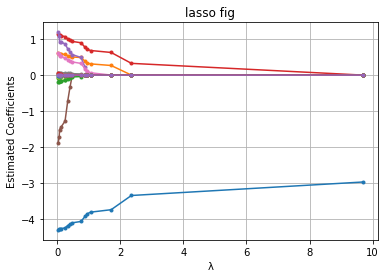

In [33]:
for y in beta.T:
    plt.plot(lam, y, marker='.')
plt.title('lasso fig')
plt.xlabel('λ')
plt.ylabel('Estimated Coefficients')
plt.grid(True)
plt.show()